<a href="https://colab.research.google.com/github/Rajakumaran-S/Seoul_Bike_Sharing_Demand_Prediction-_Capstone_Project-II/blob/main/Raja_Bike_Sharing_Demand_Prediction_Capstone_Project_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> 1. Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

## <b>2. Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of the day
* ### Temperature-Temperature in Celsius
* ### Humidity - Humidity measures %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

##<b>Know Our Data:

## <b>1. Importing Necessory Library

In [105]:
# Importing the libraries

import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [106]:
#Import all regression model going to use in this project

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

##<b>2. Reading Dataset

In [107]:
# Mounting  google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [108]:
# Reading dataset

df = pd.read_csv('/content/drive/MyDrive/Alma Better/SeoulBikeData.csv',encoding= 'unicode_escape',parse_dates=['Date'])

## <b> 3. Overview of data

In [109]:
# head of sample data:

df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [110]:
# Information of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

### <b>Observation:
* There are 14 Columns and 8760 Rows in the Dataset.
* 9 No of Numerical Variables, 1 column Datetime and 4 No of Categorical variables are there
* There No Null Values in the Dataset.

In [111]:
# description of data:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [112]:
# Columns:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [113]:
#print the unique value
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

## <b> 4. Features description

**Breakdown of Our Features:**

**Date** : *The date of the day, during 365 days from 01/12/2017 to 30/11/2018, formating in DD/MM/YYYY, type : datetime*

**Rented Bike Count** : *Number of rented bikes per hour which our dependent variable and we need to predict that, type : int*

**Hour**: *The hour of the day, starting from 0-23 it's in a digital time format, type : int, we need to convert it into category data type.*

**Temperature(°C)**: *Temperature in Celsius, type : Float*

**Humidity(%)**: *Humidity in the air in %, type : int*

**Wind speed (m/s)** : *Speed of the wind in m/s, type : Float*

**Visibility (10m)**: *Visibility in m, type : int*

**Dew point temperature(°C)**: *Temperature at the beggining of the day, type : Float*

**Solar Radiation (MJ/m2)**: *Sun contribution, type : Float*

**Rainfall(mm)**: *Amount of raining in mm, type : Float*

**Snowfall (cm)**: *Amount of snowing in cm, type : Float*

**Seasons**: *Season of the year, type : str, there are only 4 season's in data*. 

**Holiday**: *If the day  is holiday period or not, type: str*

**Functioning Day**: *If the day is a Functioning Day or not, type : str*






## <b>5. Preprocessing the data:

In [114]:
#Missing values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [115]:
# Checking duplicate values in dataset
df.duplicated().sum()

0

In [116]:
# split day of week, month and year in three column
df['day_of_week'] = df['Date'].dt.day_name() # extract week name from Date column
df["month"] = df['Date'].dt.month_name()   # extract month name from Date column
df["year"] = df['Date'].map(lambda x: x.year).astype('object')    # extract year from Date column and convert to onject type

In [117]:
#creating a new column of "weekdays_weekend" and drop the column "Date","day","year"
df['weekdays_weekend']=df['day_of_week'].apply(lambda x : 1 if x=='Saturday' or x=='Sunday' else 0 )
df=df.drop(columns=['Date','year','month'],axis=1)

In [118]:
# convert Hour,month, column integer to Categorical 
# df['Hour']=df['Hour'].astype('object')
# df['month']=df['month'].astype('object')
df['weekdays_weekend']=df['weekdays_weekend'].astype('object')

In [119]:
# Finally Check Info of data:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Hour                       8760 non-null   int64  
 2   Temperature(°C)            8760 non-null   float64
 3   Humidity(%)                8760 non-null   int64  
 4   Wind speed (m/s)           8760 non-null   float64
 5   Visibility (10m)           8760 non-null   int64  
 6   Dew point temperature(°C)  8760 non-null   float64
 7   Solar Radiation (MJ/m2)    8760 non-null   float64
 8   Rainfall(mm)               8760 non-null   float64
 9   Snowfall (cm)              8760 non-null   float64
 10  Seasons                    8760 non-null   object 
 11  Holiday                    8760 non-null   object 
 12  Functioning Day            8760 non-null   object 
 13  day_of_week                8760 non-null   objec

### <b>Observation:
* In the above data after count the missing and duplicate value we came to know that there are no missing and duplicate value present.
* So we convert the "date" column into 3 different column i.e "year","month","day".
* The "year" column in our data set is basically contain the 2 unique number contains the details of from 2017 december to 2018 november so if i consider this is a one year then we don't need the "year" column so we drop it.
* The other column "day", it contains the details about the each day of the month, for our relevence we don't need each day of each month data but we need the data about, if a day is a weekday or a weekend so we convert it into this format and drop the "day" column.


## <b> 6. Performing Some EDA:

[Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays and weekend ')]

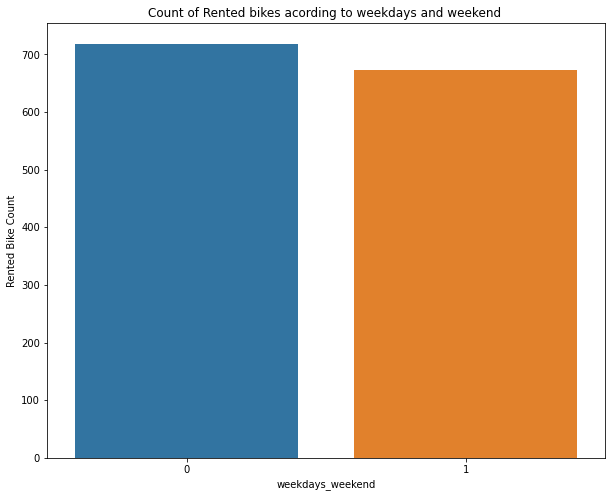

In [120]:
#anlysis of Count of Rented bikes acording to weekdays and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='weekdays_weekend',y='Rented Bike Count',ax=ax,ci = 0)
ax.set(title='Count of Rented bikes acording to weekdays and weekend ')

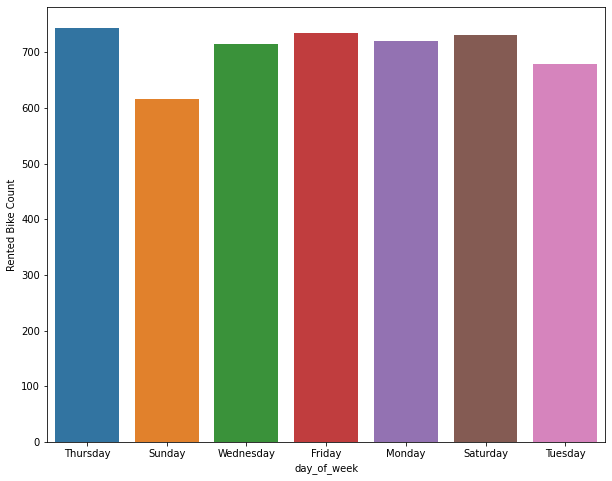

In [121]:
#anlysis of Count of Rented bikes acording to Each Day of Week and weekend by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)

In [122]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,day_of_week,weekdays_weekend
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8756,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8757,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0
8758,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes,Friday,0


In [123]:
#Count of Rented bikes acording to weekdays_weekend
data=df.groupby(df['weekdays_weekend'])['Rented Bike Count'].sum().reset_index()['Rented Bike Count']
data

0    4462544
1    1709770
Name: Rented Bike Count, dtype: int64

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays_weekend')

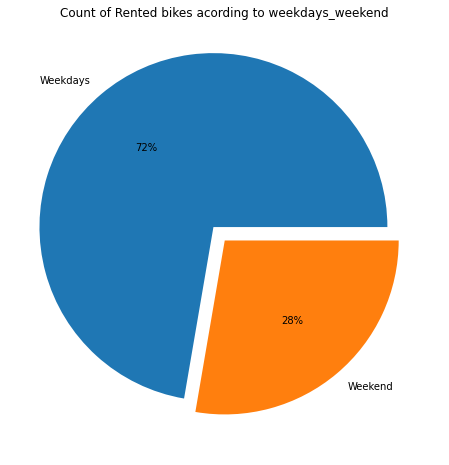

In [124]:
#anlysis of Count of Rented bikes acording to weekdays_weekend by vizualisation
fig, ax = plt.subplots(figsize =(8, 8))
plt.pie(data,autopct='%1.0f%%',labels =['Weekdays','Weekend'],explode=(0.1,0.0009))
ax.set_title('Count of Rented bikes acording to weekdays_weekend')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Holiday')]

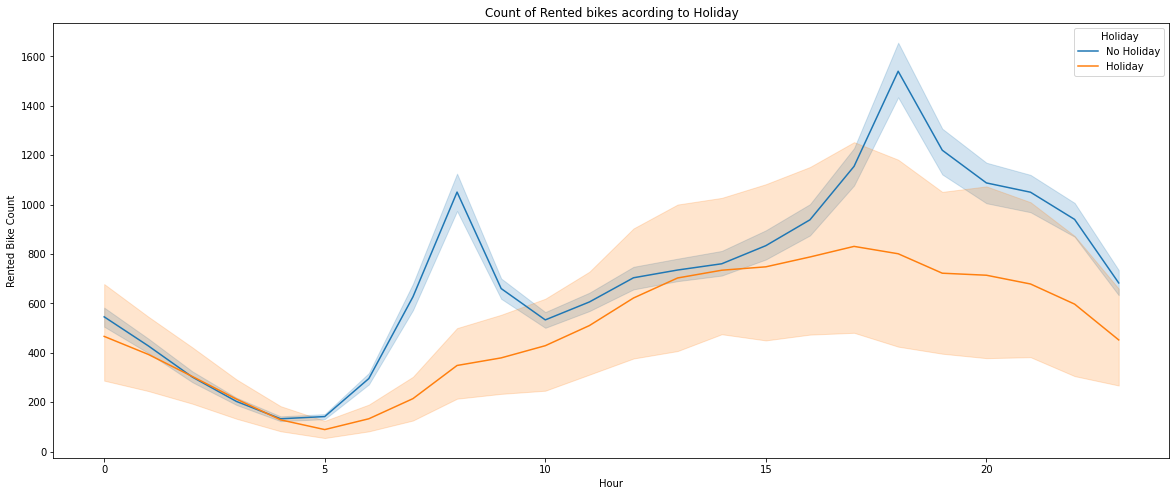

In [125]:
#anlysis of Count of Rented bikes acording to Holiday by vizualisation
fig,ax=plt.subplots(figsize=(20,8))
sns.lineplot(data=df,x='Hour',y='Rented Bike Count',hue='Holiday',ax=ax)
ax.set(title='Count of Rented bikes acording to Holiday')

In [126]:
df.columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day', 'day_of_week', 'weekdays_weekend'],
      dtype='object')

Text(0.5, 1.0, 'Count of Rented bikes acording to weekdays')

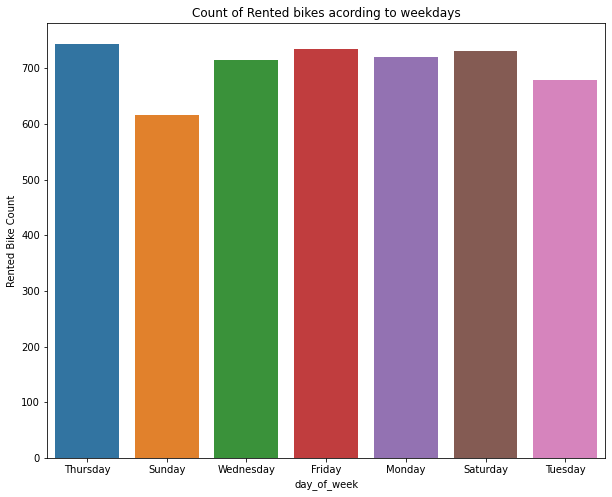

In [127]:
#anlysis of Count of Rented bikes acording to weekdays by vizualisation
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='day_of_week',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to weekdays')

Text(0.5, 1.0, 'Temprature Disribution')

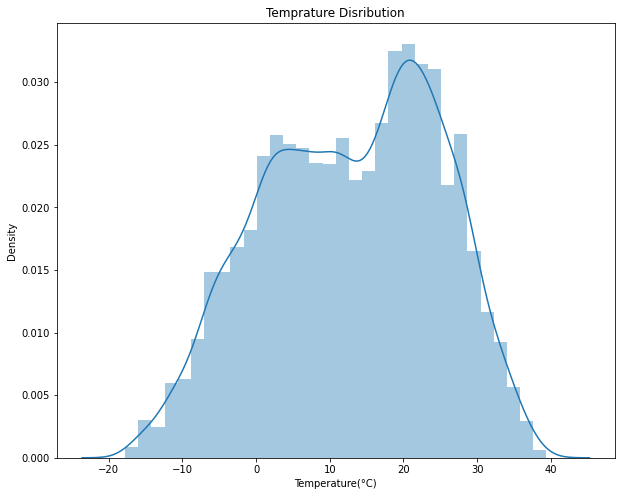

In [128]:
# Visualization of Temprature Disribution
fig,ax=plt.subplots(figsize=(10,8))
sns.distplot(df['Temperature(°C)'],ax=ax)
ax.set_title('Temprature Disribution')

Text(0.5, 1.0, 'Count of Rented bikes acording to Temprature range')

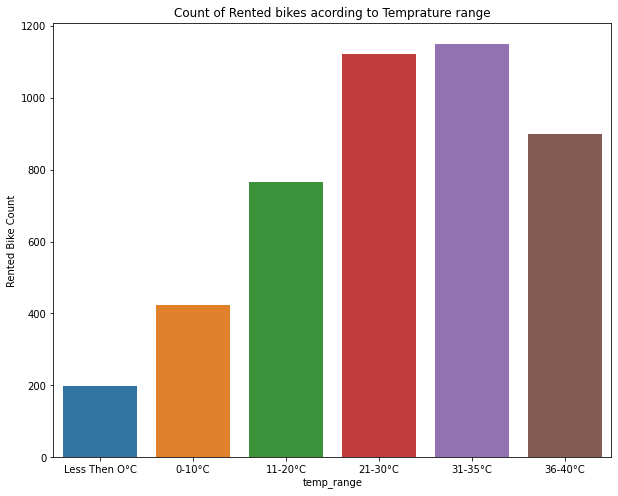

In [129]:
#anlysis of Count of Rented bikes acording to Temprature range by vizualisation
df['temp_range']=df['Temperature(°C)'].map(lambda x: 'Less Then O°C' if x<0 else '0-10°C' if 0<=x<=10 else '11-20°C' if 10<x<=20 else '21-30°C' if 20<x<=30 else '31-35°C' if 30<x<=35 else '36-40°C' if 35<x<40 else 'More then 40°C')
fig,ax=plt.subplots(figsize=(10,8))
sns.barplot(data=df,x='temp_range',y='Rented Bike Count',ax=ax,ci = 0)
ax.set_title('Count of Rented bikes acording to Temprature range')

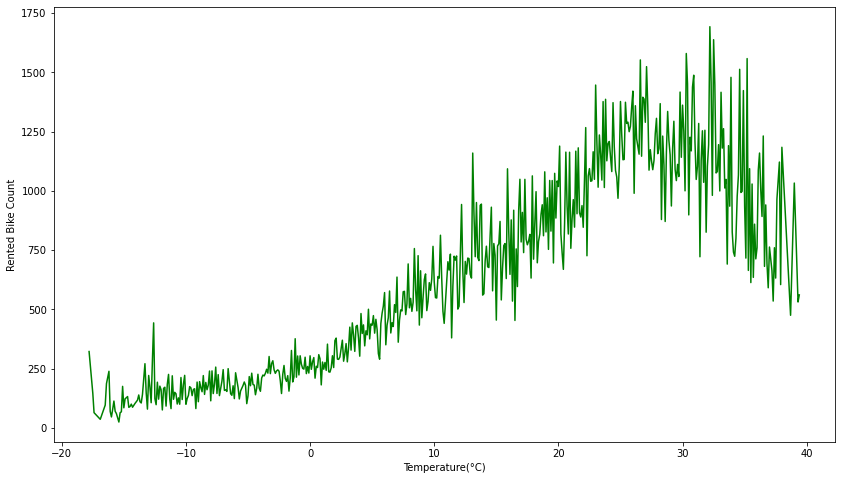

In [130]:
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.lineplot(data=df.groupby('Temperature(°C)').mean()['Rented Bike Count'],ax=ax,color='g')


[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

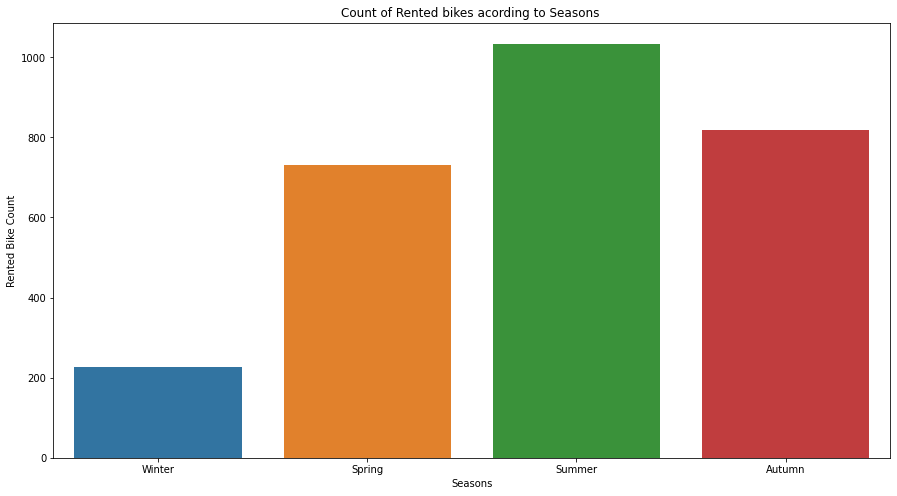

In [131]:
#anlysis of data by vizualisation
fig,ax=plt.subplots(figsize=(15,8))
sns.barplot(data=df,x='Seasons',y='Rented Bike Count',ax=ax,ci=0)
ax.set(title='Count of Rented bikes acording to Seasons ')

In [132]:
# #anlysis of data by vizualisation
# fig=plt.figure(figsize=(14,8))
# ax=plt.gca()
# sns.barplot(data=df,x='month',y='Rented Bike Count',ax=ax,ci = 0)
# ax.set(title='Count of Rented bikes acording to Month ')

## <b>7. Analyze of Numerical variables

In [133]:
# Numerical Columns
num_col=set(df.describe().columns.to_list())-{'Rented Bike Count'}
print(num_col)

{'Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Snowfall (cm)', 'Dew point temperature(°C)'}


###<b>7.1 Regression plot of Numerical variables with Rented Bike count

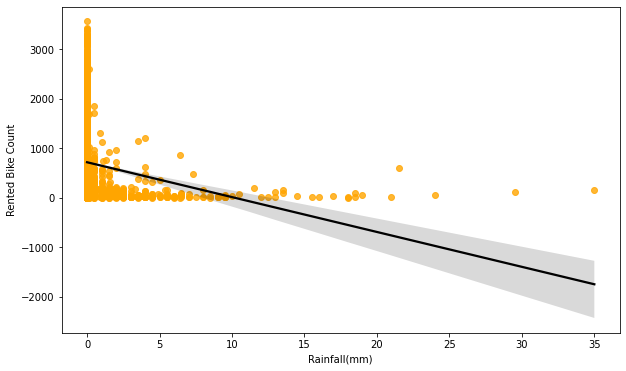

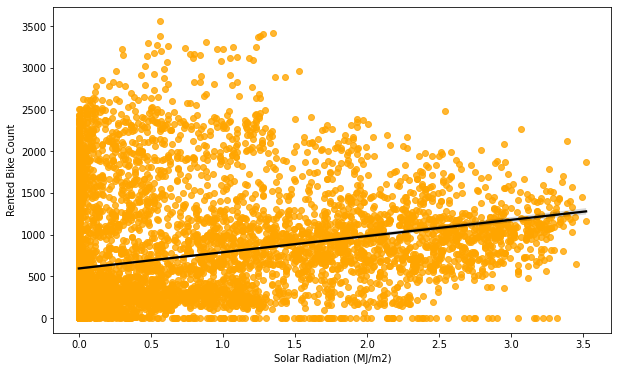

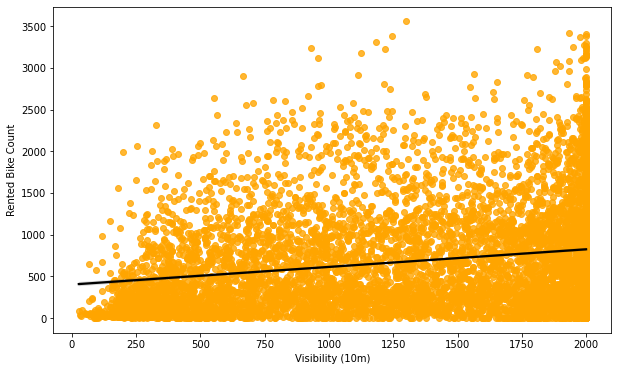

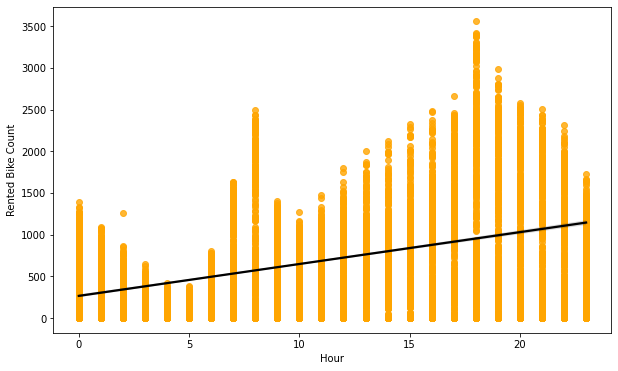

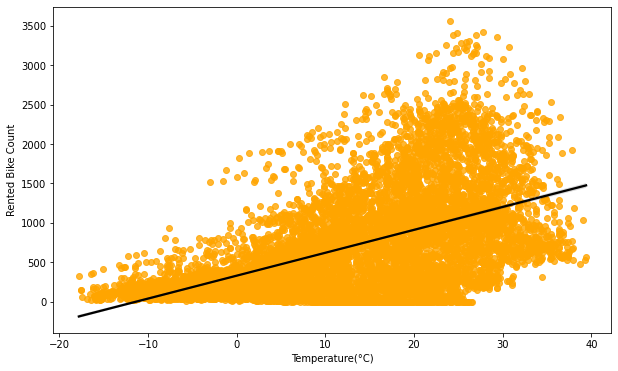

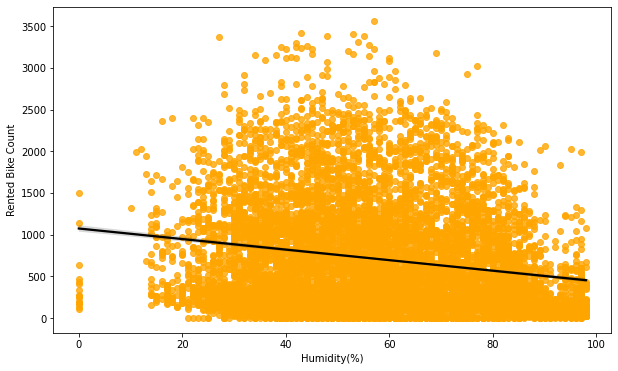

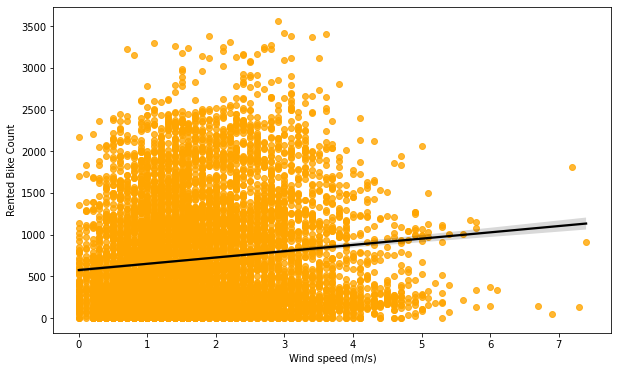

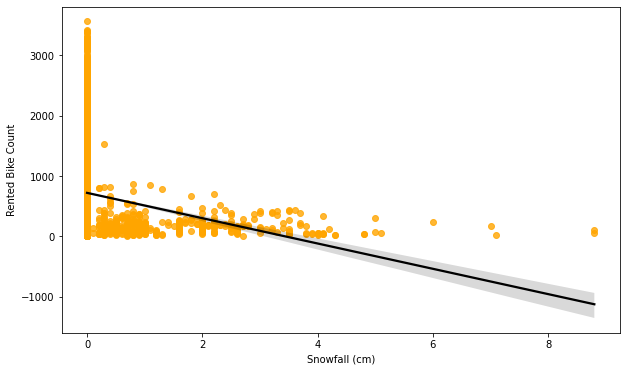

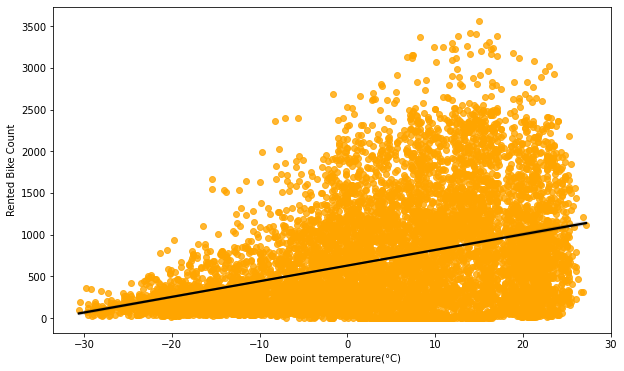

In [192]:
#printing the regression plot for all the numerical features
for col in num_col:
  fig,ax=plt.subplots(figsize=(10,6))
  sns.regplot(x=df[col],y=df['Rented Bike Count'],scatter_kws={"color": 'orange'}, line_kws={"color": "black"})

###**7.2 Checking of Correlation between variables**


In [135]:
# Correlation with Rented Bike Count
df.corr()['Rented Bike Count']

Rented Bike Count            1.000000
Hour                         0.410257
Temperature(°C)              0.538558
Humidity(%)                 -0.199780
Wind speed (m/s)             0.121108
Visibility (10m)             0.199280
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Name: Rented Bike Count, dtype: float64

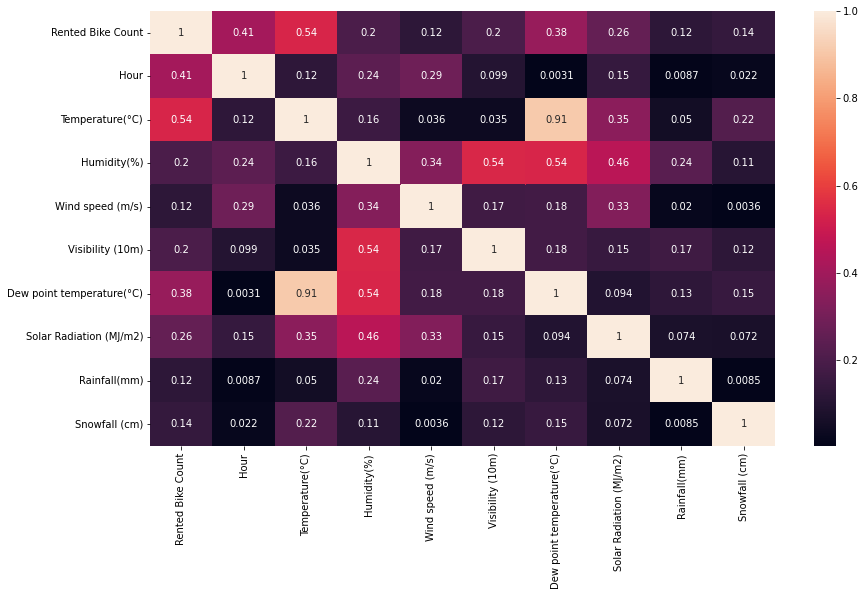

In [136]:
# using seaborn heatmap for ploting correlation graph 
fig=plt.figure(figsize=(14,8))
ax=plt.gca()
sns.heatmap(abs(df.corr()),ax=ax,annot=True)

### <b>Observation:
 * From the Heat map, we got high Corelation Between Temperature and Dew Point Temperatue.

### <b>7.3 Checking Multicollinearity

In [137]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [138]:
#Check Multicollinearity of Numerical Columns
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count']]])

,variables,VIF
0,Hour,4.418242
1,Temperature(°C),33.385256
2,Humidity(%),5.371996
3,Wind speed (m/s),4.805364
4,Visibility (10m),9.085977
5,Dew point temperature(°C),17.126199
6,Solar Radiation (MJ/m2),2.881590
7,Rainfall(mm),1.081567
8,Snowfall (cm),1.120833


In [139]:
#Check Multicollinearity of Numerical Columns by Removing High VIF value of column Temperature
calc_vif(df[[i for i in df.describe().columns if i not in ['Rented Bike Count','Temperature(°C)']]]) 

,variables,VIF
0,Hour,3.847933
1,Humidity(%),5.262460
2,Wind speed (m/s),4.729187
3,Visibility (10m),4.964387
4,Dew point temperature(°C),1.656085
5,Solar Radiation (MJ/m2),1.914776
6,Rainfall(mm),1.079939
7,Snowfall (cm),1.111339


In [140]:
#final Numerical Columns
num_col_list=list(num_col-{'Temperature(°C)'})
num_col_list

['Rainfall(mm)',
 'Solar Radiation (MJ/m2)',
 'Visibility (10m)',
 'Hour',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Snowfall (cm)',
 'Dew point temperature(°C)']

In [141]:
#Final Numerical Column Dataset
num_col_df=df[num_col_list]
num_col_df

,Rainfall(mm),Solar Radiation (MJ/m2),Visibility (10m),Hour,Humidity(%),Wind speed (m/s),Snowfall (cm),Dew point temperature(°C)
0,0.0,0.0,2000,0,37,2.2,0.0,-17.6
1,0.0,0.0,2000,1,38,0.8,0.0,-17.6
2,0.0,0.0,2000,2,39,1.0,0.0,-17.7
3,0.0,0.0,2000,3,40,0.9,0.0,-17.6
4,0.0,0.0,2000,4,36,2.3,0.0,-18.6
...,...,...,...,...,...,...,...,...
8755,0.0,0.0,1894,19,34,2.6,0.0,-10.3
8756,0.0,0.0,2000,20,37,2.3,0.0,-9.9
8757,0.0,0.0,1968,21,39,0.3,0.0,-9.9
8758,0.0,0.0,1859,22,41,1.0,0.0,-9.8


###<b> Observation:
* While checking Multocollinearity by using variance infuance Factor, Temperature having high VIF value. so we removed that.

## <b> 8. Dealing with Categorical Columns Preprocessing:

In [142]:
# Categorical Columns List
cat_col_list=list(set(df.describe(include=['object']).columns.to_list())-{'day_of_week','temp_range','weekdays_weekend'})
cat_col_list

['Seasons', 'Functioning Day', 'Holiday']

In [143]:
# Categorical Columns Dataset
new_cat_col=df[cat_col_list]
new_cat_col

,Seasons,Functioning Day,Holiday
0,Winter,Yes,No Holiday
1,Winter,Yes,No Holiday
2,Winter,Yes,No Holiday
3,Winter,Yes,No Holiday
4,Winter,Yes,No Holiday
...,...,...,...
8755,Autumn,Yes,No Holiday
8756,Autumn,Yes,No Holiday
8757,Autumn,Yes,No Holiday
8758,Autumn,Yes,No Holiday


In [144]:
# Data encoding with Numerical Value
encoders_nums = {"Holiday":{"Holiday":1,"No Holiday":0},
                 "Functioning Day":{"Yes":1,"No":0}}

new_cat_col = new_cat_col.replace(encoders_nums)

In [145]:
# Hot Encoding remainging Categorical Feature: 
cat_col_df= pd.get_dummies(new_cat_col, columns=["Seasons"])
cat_col_df

,Functioning Day,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,1,0,0,0,0,1
1,1,0,0,0,0,1
2,1,0,0,0,0,1
3,1,0,0,0,0,1
4,1,0,0,0,0,1
...,...,...,...,...,...,...
8755,1,0,1,0,0,0
8756,1,0,1,0,0,0
8757,1,0,1,0,0,0
8758,1,0,1,0,0,0


In [146]:
#Join both Numerical and Categorical Columns Features in Final Dataset(independent variables)
final_df=pd.concat((num_col_df,cat_col_df),axis=1)
final_df


,Rainfall(mm),Solar Radiation (MJ/m2),Visibility (10m),Hour,Humidity(%),Wind speed (m/s),Snowfall (cm),Dew point temperature(°C),Functioning Day,Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,0.0,0.0,2000,0,37,2.2,0.0,-17.6,1,0,0,0,0,1
1,0.0,0.0,2000,1,38,0.8,0.0,-17.6,1,0,0,0,0,1
2,0.0,0.0,2000,2,39,1.0,0.0,-17.7,1,0,0,0,0,1
3,0.0,0.0,2000,3,40,0.9,0.0,-17.6,1,0,0,0,0,1
4,0.0,0.0,2000,4,36,2.3,0.0,-18.6,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,0.0,0.0,1894,19,34,2.6,0.0,-10.3,1,0,1,0,0,0
8756,0.0,0.0,2000,20,37,2.3,0.0,-9.9,1,0,1,0,0,0
8757,0.0,0.0,1968,21,39,0.3,0.0,-9.9,1,0,1,0,0,0
8758,0.0,0.0,1859,22,41,1.0,0.0,-9.8,1,0,1,0,0,0


In [147]:
#Final Dataset Columns (independent variables)
columns=final_df.describe(include='all').columns
columns

Index(['Rainfall(mm)', 'Solar Radiation (MJ/m2)', 'Visibility (10m)', 'Hour',
       'Humidity(%)', 'Wind speed (m/s)', 'Snowfall (cm)',
       'Dew point temperature(°C)', 'Functioning Day', 'Holiday',
       'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter'],
      dtype='object')

In [148]:
#Final Dataset information (independent variables)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rainfall(mm)               8760 non-null   float64
 1   Solar Radiation (MJ/m2)    8760 non-null   float64
 2   Visibility (10m)           8760 non-null   int64  
 3   Hour                       8760 non-null   int64  
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Snowfall (cm)              8760 non-null   float64
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Functioning Day            8760 non-null   int64  
 9   Holiday                    8760 non-null   int64  
 10  Seasons_Autumn             8760 non-null   uint8  
 11  Seasons_Spring             8760 non-null   uint8  
 12  Seasons_Summer             8760 non-null   uint8  
 13  Seasons_Winter             8760 non-null   uint8

In [149]:
#Final indipendent variables
X=final_df

## <b>9. Normalise Target variable - Rented_Bike_Count column data

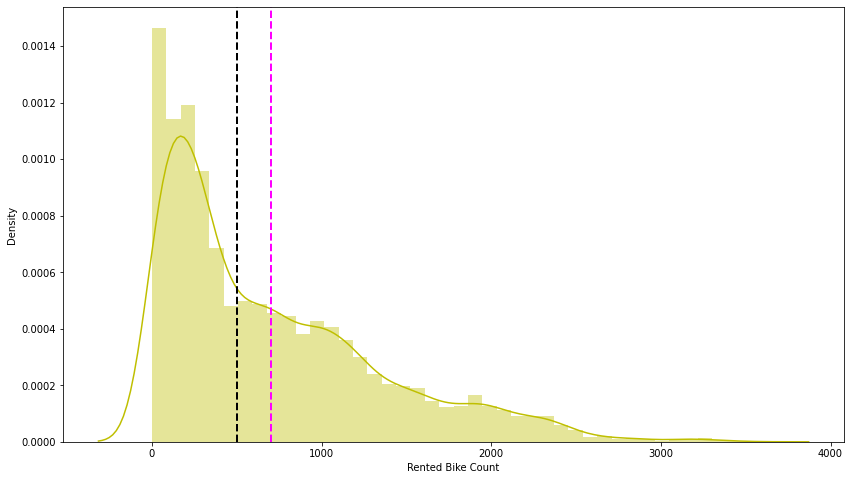

In [150]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(14,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')
ax=sns.distplot(df['Rented Bike Count'],hist=True ,color="y")
ax.axvline(df['Rented Bike Count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rented Bike Count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

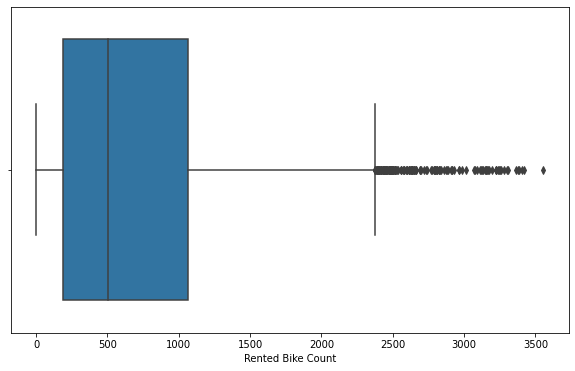

In [151]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Rented Bike Count'])
plt.show()

Text(0.5, 1.0, 'Square root')

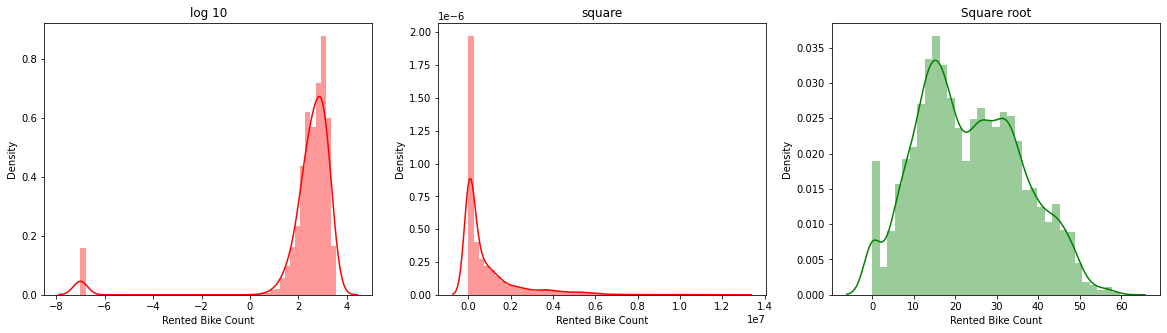

In [152]:
#Finding Normalize Plot 
fig,axes = plt.subplots(1,3,figsize=(20,5))
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='red').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='green').set_title("Square root")

In [153]:
#Target Variable
y=np.sqrt(df['Rented Bike Count'])

###<b>Observation:
* In above Distribution Plots Squre Root of Target variable perfected fitting of normal Distribution compared to log and squre.

## <b>10. Splitting Training & Testing Dataset

In [154]:
#Spliting datadet into Training Dataset and Testing Dataset
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(7008, 14)
(1752, 14)


## <b>11. Scaling Training and Testing Dataset with Standard Scaling

In [155]:
# Standard Scaling
scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

## <B>12. Applying Regression model

In [157]:
#Create list of Regression Model
models=[['LinearRegression: ',LinearRegression()],
        ['Lasso:',Lasso()],
        ['Ridge:',Ridge()],
        ['ElasticNet:',ElasticNet()],
        ['DecisionTreeRegressor:',DecisionTreeRegressor()],
        ['RandomForestRegressor:',RandomForestRegressor()],
        ['GradientBoostingRegressor:',GradientBoostingRegressor()],
        ['XGBRegressor:',XGBRegressor()]]


In [158]:
#Create a Function for Fitting algorithm and storing the result
model_data=[]
def calc_model_result(regressor,model_name):
  curr_model_data={}
  curr_model_data['name']=model_name
  regressor.fit(X_train,y_train)
  curr_model_data['MAE_train']=round(mean_absolute_error(y_train,regressor.predict(X_train)),2)
  curr_model_data['MAE_test']=round(mean_absolute_error(y_test,regressor.predict(X_test)),2)
  curr_model_data['r2_score_train']=round(r2_score(y_train,regressor.predict(X_train)),2)
  curr_model_data['r2_score_test']=round(r2_score(y_test,regressor.predict(X_test)),2)
  curr_model_data['RMSE score_train']=round(np.sqrt(r2_score(y_train,regressor.predict(X_train))),2)
  curr_model_data['RMSE score_test']=round(np.sqrt(r2_score(y_test,regressor.predict(X_test))),2)
  model_data.append(curr_model_data)


In [159]:
#Calculate all Model result
for name,curr_model in models:
  calc_model_result(curr_model,name)                                            

[13:40:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [160]:
#Result of all algorithm  to store in dataframe for future comparision
model_result=pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.68,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.70,1.00,0.81,1.00,0.90
5,RandomForestRegressor:,1.01,2.86,0.99,0.89,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,3.27,3.47,0.87,0.86,0.93,0.93


## <b>13. Hyper parameter tuning

### <b> 13.1 Lasso & Ridge

In [161]:
#Hyper Parameter Tuning using grid search Cross Validation
models2=[['Lasso_Hyper_tuned:',Lasso()],['Ridge_Hyper_tuned:',Ridge()]]
for name,curr_model in models2:
  parameters = {'alpha': np.linspace(-10,10,100)}
  tuned_regressor = GridSearchCV(curr_model, parameters, scoring='neg_mean_squared_error',cv=5)
  calc_model_result(tuned_regressor,name) 

In [162]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result


,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.68,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.70,1.00,0.81,1.00,0.90
5,RandomForestRegressor:,1.01,2.86,0.99,0.89,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,3.27,3.47,0.87,0.86,0.93,0.93
8,Lasso_Hyper_tuned:,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned:,5.59,5.66,0.65,0.65,0.81,0.81


### <b> 13.2 Random Forest Regressor

In [163]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
rfr = RandomForestRegressor(random_state=1)
param_grid = {'max_depth': [8,9,10],'n_estimators': [50,60,70,80,90,100]}
g_sr = GridSearchCV(estimator = rfr, param_grid = param_grid, scoring = 'neg_mean_squared_error',cv = 5)
g_sr.fit(X_train,y_train)
best_params=g_sr.best_params_
print('the best parameter of random forest regressor:',best_params)

the best parameter of random forest regressor: {'max_depth': 10, 'n_estimators': 80}


In [164]:
#Hyper Parameter Tuning with best Parameter
rf_tuned_regressor = RandomForestRegressor(max_depth=best_params['max_depth'],n_estimators=best_params['n_estimators'])
calc_model_result(rf_tuned_regressor,'RandomForestReg_Hyper_tuned:') 

In [165]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.68,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.70,1.00,0.81,1.00,0.90
5,RandomForestRegressor:,1.01,2.86,0.99,0.89,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,3.27,3.47,0.87,0.86,0.93,0.93
8,Lasso_Hyper_tuned:,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned:,5.59,5.66,0.65,0.65,0.81,0.81


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: RANDOM FOREST')

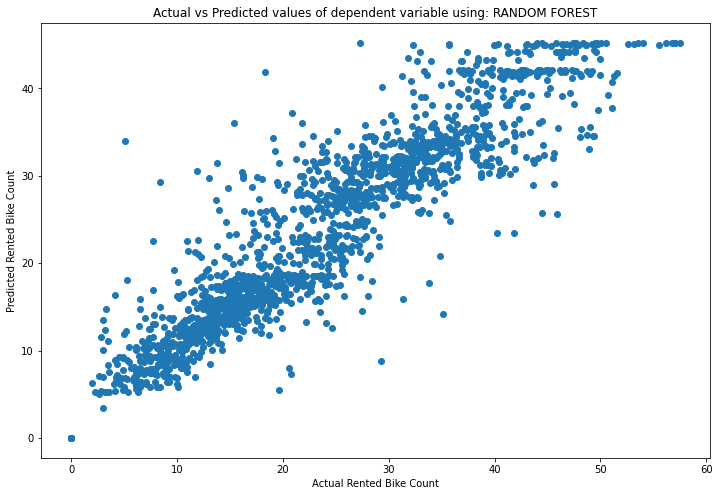

In [180]:
# Actual vs predicted values of dependent variables
plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=rf_tuned_regressor.predict(X_test))
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: RANDOM FOREST')

###<b>13.3 XG Boosting Regressor

In [166]:
#Hyper Parameter Tuning using grid search Cross Validation to find best paramter
parameter_dict = {'n_estimators' : [50,80,100],
              'max_depth' : [4,6,8],
              'min_samples_split' : [50,100,150],
              'min_samples_leaf' : [40,50]}
# Create an instance of the XG Boost Regressor
xg_boost =XGBRegressor()

# Grid search
xg_grid = GridSearchCV(estimator=xg_boost,
                       param_grid = parameter_dict,
                       cv = 5, verbose=2)

xg_grid.fit(X_train,y_train)
xg_grid.best_estimator_

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[13:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[13:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.3s
[13:43:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[13:43:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.2s
[13:43:10] WARNING: /works

XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)

In [167]:
#Hyper Parameter Tuning with best Parameter
xg_tuned_regressor = XGBRegressor(max_depth=8, min_samples_leaf=40, min_samples_split=50)
calc_model_result(xg_tuned_regressor,'XGBRegressor_Hyper_tuned:') 

[13:45:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [168]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.68,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.70,1.00,0.81,1.00,0.90
5,RandomForestRegressor:,1.01,2.86,0.99,0.89,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,3.27,3.47,0.87,0.86,0.93,0.93
8,Lasso_Hyper_tuned:,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned:,5.59,5.66,0.65,0.65,0.81,0.81


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: XG BOOST')

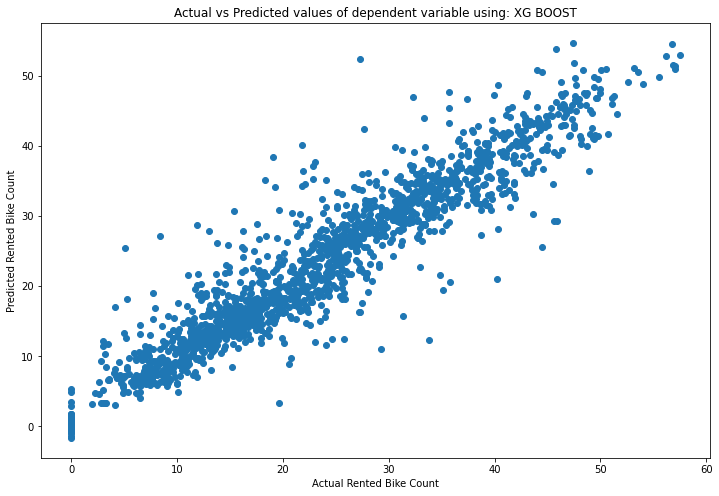

In [190]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=xg_tuned_regressor.predict(X_test))
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: XG BOOST')

###<b> 13.4 Gradiant Boosting Regressor

In [169]:
# GBM model
gb_model = GradientBoostingRegressor(random_state=0)
gb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(25,31)}
# finding best parameters
gb_gridsearch = GridSearchCV(gb_model,gb_params,cv=5,scoring='neg_mean_squared_error')
gb_gridsearch.fit(X_train,y_train)
gb_gridsearch.best_params_

{'min_samples_leaf': 26, 'n_estimators': 500}

In [ ]:
#Hyper Parameter Tuning with best Parameter
gb_tuned_regressor = GradientBoostingRegressor(n_estimators=500,
                                     min_samples_leaf=26,
                                     random_state=0)
calc_model_result(gb_tuned_regressor,'GradientBoostingReg_Hyper_tuned')

In [175]:
#Result of all algorithm
model_result=pd.DataFrame(model_data)
model_result

,name,MAE_train,MAE_test,r2_score_train,r2_score_test,RMSE score_train,RMSE score_test
0,LinearRegression:,5.59,5.68,0.65,0.65,0.81,0.80
1,Lasso:,8.50,8.69,0.25,0.23,0.50,0.48
2,Ridge:,5.60,5.65,0.65,0.65,0.81,0.81
3,ElasticNet:,9.43,9.55,0.15,0.13,0.38,0.37
4,DecisionTreeRegressor:,0.00,3.70,1.00,0.81,1.00,0.90
5,RandomForestRegressor:,1.01,2.86,0.99,0.89,0.99,0.94
6,GradientBoostingRegressor:,3.32,3.51,0.87,0.86,0.93,0.92
7,XGBRegressor:,3.27,3.47,0.87,0.86,0.93,0.93
8,Lasso_Hyper_tuned:,5.87,6.00,0.62,0.62,0.79,0.79
9,Ridge_Hyper_tuned:,5.59,5.66,0.65,0.65,0.81,0.81


Text(0.5, 1.0, 'Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

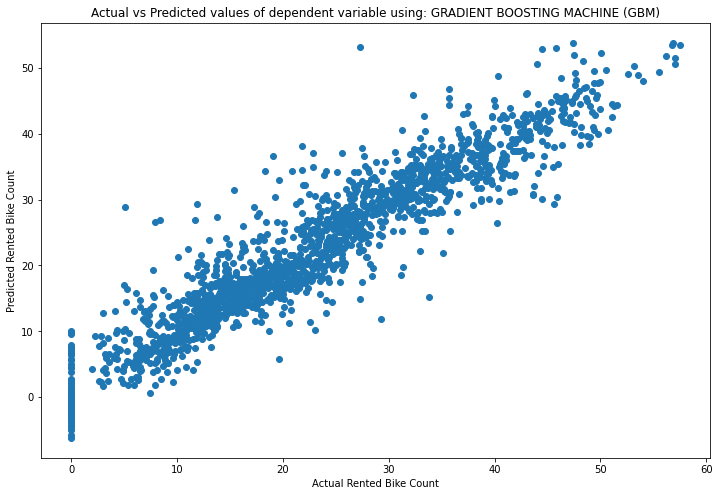

In [184]:
# Actual vs predicted values of dependent variables

plt.figure(figsize=(12,8))
plt.scatter(x=y_test,y=gb_tuned_regressor.predict(X_test))
plt.xlabel('Actual Rented Bike Count')
plt.ylabel('Predicted Rented Bike Count')
plt.title('Actual vs Predicted values of dependent variable using: GRADIENT BOOSTING MACHINE (GBM)')

##<b> 14. Features Importance

### <b>14.1 Random Forest Imprtance Features

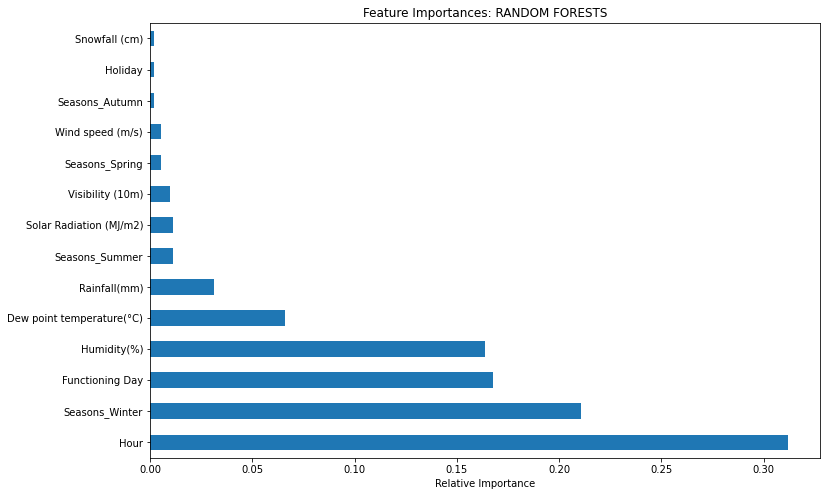

In [187]:
#plot a barplot  of importance features
rf_feat_imp = pd.Series(rf_tuned_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: RANDOM FORESTS')
plt.xlabel('Relative Importance')
rf_feat_imp.nlargest(20).plot(kind='barh')

###<b> 14.2 Gradient boosting feature importances

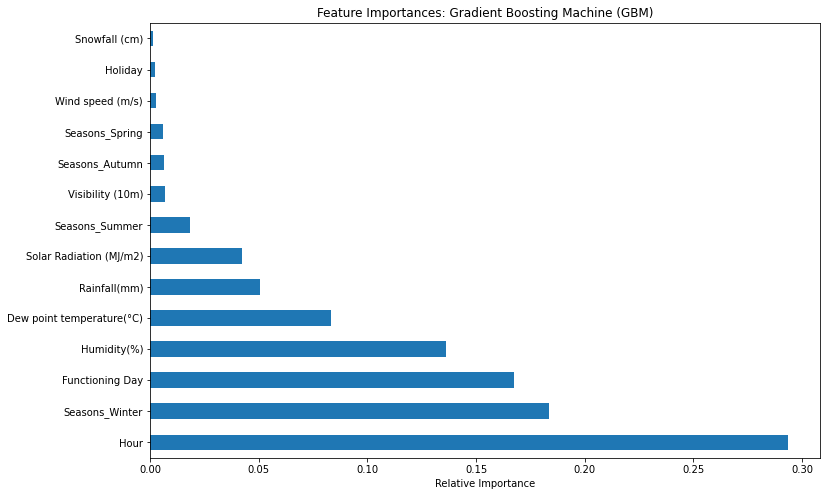

In [185]:
#plot a barplot  of importance features
gbm_feat_imp = pd.Series(gb_tuned_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: Gradient Boosting Machine (GBM)')
plt.xlabel('Relative Importance')
gbm_feat_imp.nlargest(20).plot(kind='barh')

###<b> 14.3 XG boost feature importances

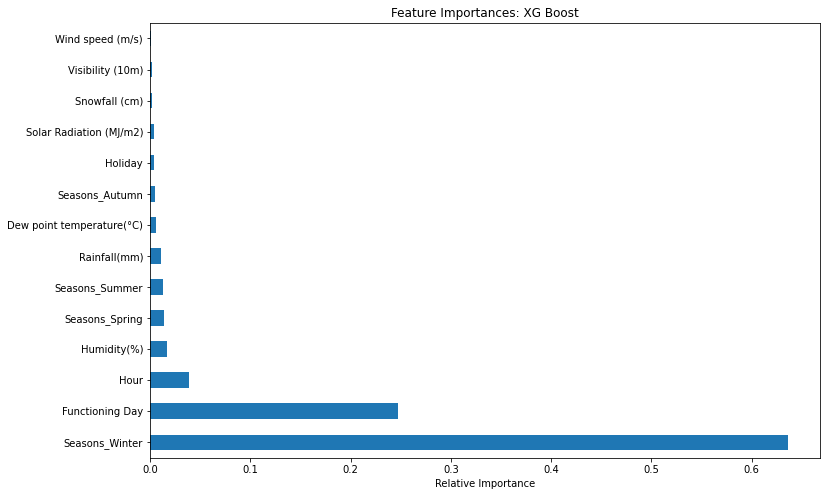

In [186]:
#plot a barplot  of importance features
xgb_feat_imp = pd.Series(xg_tuned_regressor.feature_importances_, index=X.columns)
plt.figure(figsize=(12,8))
plt.title('Feature Importances: XG Boost')
plt.xlabel('Relative Importance')
xgb_feat_imp.nlargest(20).plot(kind='barh')

##<b>15. Summary and conclusions:

#Conclusions:

* #### As we have calculated MAE,MSE,RMSE and R2 score for each model. Based on r2 score will decide our model performance.
* #### assumption: if the differnece of R2 score between Train data and Test is more than 5 % we will consider it as overfitting. 

# Linear,Lasso,Ridge and ElasticNet.

* #### From The above data frame, we can see that linear,Lasso,Ridge  and Elastic  regression models have maximum R2 scores(65%) on both training and test data.(Even after using GridserachCV we have got similar results as of base models).
 
# Decision Tree Regressor:
* #### On Decision tree regressor model, without hyperparameter tuning we got r2 score as 100% on training data and on test data 81%. Testing performance very low  compared to training data .So it was a overfitted model.

# Random Forest:

* #### On Random Forest regressor model, without hyperparameter tuning we got r2 score as 99% on training data and 89% on test data. Testing performance very low  compared to training data .So it was a overfitted model, as per our assumption
* #### After hyperparameter tuning we got r2 score as 91% on training data and 86% on test data which is  very good for us.
# Gradient Boosting Regression(Gradient Boosting Machine):

* #### On Gradient Boosting Regression model, without hyperparameter tuning we got r2 score as 87% on training data and 86% on test data.Our model performed well without hyperparameter tuning.
* #### After hyperparameter tuning we got r2 score as 91% on training data and 89% on test data,thus we improved the model performance by hyperparameter tuning.

# XG Boost Regression:

 * #### On XG Boost Regression model, without hyperparameter tuning we got r2 score as 87% on training data and 86% on test data.Our model performed well without hyperparameter tuning.
* #### After hyperparameter tuning we got r2 score as 97% on training data and 96% on test data,thus we improved the model performance by hyperparameter tuning.

* ## Thus Gradient Boosting Regression(GridSearchCV), Random forest(GridSearchCV) gives good r2 scores. We can deploy this models.